<a href="https://colab.research.google.com/github/kapil120/GoogleColab/blob/master/MP_Nueron_And_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sklearn.datasets
import numpy as np

# Loading Dataset

In [0]:
breast_cancer=sklearn.datasets.load_breast_cancer()

In [0]:
X=breast_cancer.data
Y=breast_cancer.target

In [4]:
print(X)
print(Y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [5]:
print(X.shape, Y.shape)

(569, 30) (569,)


In [0]:
import pandas as pd

In [0]:
data=pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)
data["class"]=breast_cancer.target

In [8]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
  data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [10]:
print(data["class"].value_counts())

1    357
0    212
Name: class, dtype: int64


In [11]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [12]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


# Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X=data.drop("class",axis=1)
Y=data['class']

In [15]:
type(X)

pandas.core.frame.DataFrame

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [17]:
print(X.shape,x_train.shape,x_test.shape)

(569, 30) (455, 30) (114, 30)


# Binarisation Of Input

In [0]:
import matplotlib.pyplot as plt

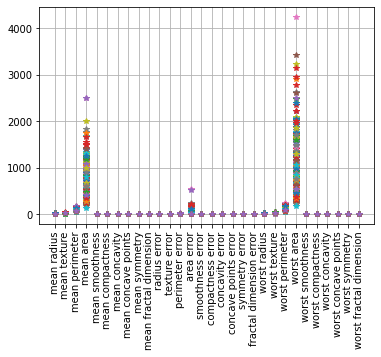

In [19]:
plt.plot(x_train.T,"*") #here T stands for transpose
plt.xticks(rotation='vertical')
plt.grid()
plt.show()

In [0]:
x_binarised_3_train=x_train['mean area'].map(lambda x:0 if x<1000 else 1)

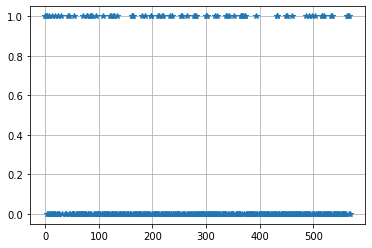

In [21]:
plt.plot(x_binarised_3_train,"*")
plt.grid()

In [0]:
x_binarised_train=x_train.apply(pd.cut,bins=2,labels=[0,1])

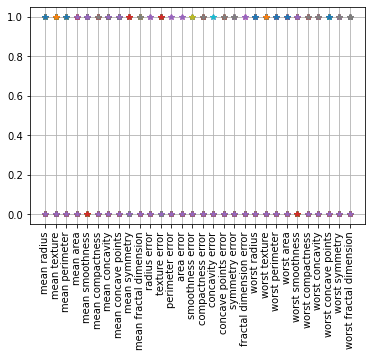

In [23]:
plt.plot(x_binarised_train.T,"*") #here T stands for transpose
plt.xticks(rotation='vertical')
plt.grid()
plt.show()

In [0]:
x_binarised_test=x_test.apply(pd.cut,bins=2,labels=[0,1])

In [25]:
type(x_binarised_test)

pandas.core.frame.DataFrame

In [0]:
x_binarised_test=x_binarised_test.values
x_binarised_train=x_binarised_train.values

In [27]:
type(x_binarised_train)

numpy.ndarray

In [31]:
print(x_binarised_train)

[[0 0 0 ... 0 0 0]
 [1 0 1 ... 1 0 0]
 [1 1 1 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# MP Neuron Class

$y=1,if\sum_ix_i>=b$

y=0, Otherwise

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
class MPNueron:
  
  def __init__(self):
    self.b=None

  def model(self,x):
    return(sum(x)>=self.b)
  
  def predict(self,X):
    Y=[]
    for x in X:
      result=self.model(x)
      Y.append(result)

    return np.array(Y)

  def fit(self,X,Y):
    accuracy={}
    for b in range(X.shape[1]+1):
      self.b=b
      Y_pred=self.predict(X)
      accuracy[b]=accuracy_score(Y_pred,Y)
    
    best_b=max(accuracy,key=accuracy.get)
    self.b=best_b

    print('Optimal value of b is',best_b)
    print('Highest accuracy is',accuracy[best_b])


In [30]:
mp_neuron=MPNueron()
mp_neuron.fit(x_binarised_train,y_train)

Optimal value of b is 0
Highest accuracy is 0.6417582417582418


In [0]:
y_test_pred=mp_neuron.predict(x_binarised_test)
accuracy_test=accuracy_score(y_test_pred,y_test)

In [33]:
print(accuracy_test)

0.5701754385964912


#Perceptron Class

$y=1,if\sum_iw_ix_i>=b$

y=0, Otherwise

In [0]:
class Perceptron:

  def __init__(self):
    self.w=None
    self.b=None

  def model(self,x):
    return 1 if (np.dot(self.w,x)>=self.b) else 0

  def predict(self,X):
    Y=[]
    for x in X:
      result=self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self,X,Y,ephocs=2):

    self.w=np.ones(X.shape[1])
    self.b=0
    max_accuracy=0
    accuracy={}
    for i in range(ephocs):
      for x,y in zip(X,Y):
        y_pred=self.model(x)
        if y==1 and y_pred==0:
          self.w=self.w+x
          self.b=self.b+1
        elif y==0 and y_pred==0:
          self.w=self.w-x
          self.b=self.b-1
      accuracy[i]=accuracy_score(self.predict(X),Y)

      if(accuracy[i]>max_accuracy):
        max_accuracy=accuracy[i]
        chkptw=self.w
        chkptb=self.b
    self.w=chkptw
    self.b=chkptb
    print(max_accuracy)
      # plt.plot(accuracy.values())
      # plt.show()


In [0]:
perceptron=Perceptron()

In [72]:
perceptron.fit(x_train,y_train,2)

0.6417582417582418


In [49]:
y_pred_train=perceptron.predict(x_train)
print(accuracy_score(y_pred_train,y_train))

0.6417582417582418
